In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pprint
import pyphi

import phial.toolbox as tb
import phial.node_functions as nf
import phial.experiment as ex
from phial.utils import tic,toc
from phial.experiment import Experiment
tic() # start tracking time of Notebook load

## From Larissa's 2015 paper https://www.mdpi.com/1099-4300/17/8/5472

In [2]:
import numpy as np
tpm=np.array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
cm=np.array([[1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1]], dtype=np.uint8)
G = nx.DiGraph(cm)
net = tb.Net(edges=G.edges(), tpm=tpm)
net.info()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'nodes': ['A(0): 2,MJ_func',
  'B(1): 2,MJ_func',
  'C(2): 2,MJ_func',
  'D(3): 2,MJ_func',
  'E(4): 2,MJ_func',
  'F(5): 2,MJ_func'],
 'num_in_states': 64,
 'num_unreachable_states': 32,
 'num_state_cc': 4,
 'num_state_cycles': 4}

In [3]:
nx.DiGraph(pyphi.convert.state_by_node2state_by_state(net.tpm))

In [4]:
net.tpm

,A,B,C,D,E,F
000000,0.0,0.0,0.0,0.0,0.0,0.0
100000,1.0,1.0,0.0,0.0,0.0,0.0
010000,0.0,1.0,1.0,0.0,0.0,0.0
110000,1.0,0.0,1.0,0.0,0.0,0.0
001000,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
110111,0.0,0.0,1.0,1.0,0.0,0.0
001111,1.0,0.0,1.0,0.0,0.0,0.0
101111,0.0,1.0,1.0,0.0,0.0,0.0
011111,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
exp = Experiment([],
    net=net,
    title='High Phi in 6 nodes',
    comment='From Larissas 2015 paperm https://www.mdpi.com/1099-4300/17/8/5472',
    )

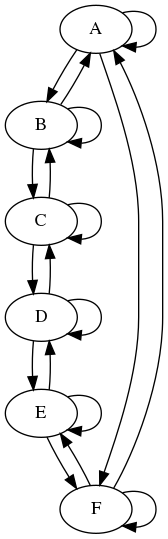

In [6]:
from IPython.display import Image
net.gvgraph('hifi.png')
Image(filename='hifi.png')

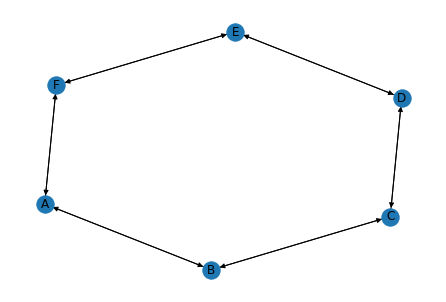

In [7]:
net.draw()

In [8]:
%time net.phi('000011')

CPU times: user 1.35 s, sys: 142 ms, total: 1.49 s
Wall time: 26.7 s


20.906248

In [9]:
exp.run()

Saved experiment with results to: /home/pothiers/phial/results_2020-05-14T19:06:03.412248.json


{'timestamp': '2020-05-14 18:51:36.466003',
 'duration': 866.9462428470142,
 'results': {'010100': {'phi': 20.906248,
   'elapsed_seconds': 27.224281032104045},
  '111010': {'phi': 20.906248, 'elapsed_seconds': 27.155748130055144},
  '011011': {'phi': 20.906248, 'elapsed_seconds': 27.80376386991702},
  '010001': {'phi': 20.906248, 'elapsed_seconds': 28.17320519592613},
  '000101': {'phi': 20.906248, 'elapsed_seconds': 27.164079393958673},
  '001100': {'phi': 20.906248, 'elapsed_seconds': 27.025822300929576},
  '000000': {'phi': 20.906248, 'elapsed_seconds': 26.85567217390053},
  '110000': {'phi': 20.906248, 'elapsed_seconds': 26.70149145112373},
  '011000': {'phi': 20.906248, 'elapsed_seconds': 26.782974147005007},
  '110011': {'phi': 20.906248, 'elapsed_seconds': 26.626598831964657},
  '101011': {'phi': 20.906248, 'elapsed_seconds': 26.44785192515701},
  '011110': {'phi': 20.906248, 'elapsed_seconds': 26.70327465189621},
  '001010': {'phi': 20.906248, 'elapsed_seconds': 26.66926468000

In [10]:
exp.info()

{'timestamp': '2020-05-14 18:51:36.466003',
 'duration': 866.9462428470142,
 'results': {'010100': {'phi': 20.906248,
   'elapsed_seconds': 27.224281032104045},
  '111010': {'phi': 20.906248, 'elapsed_seconds': 27.155748130055144},
  '011011': {'phi': 20.906248, 'elapsed_seconds': 27.80376386991702},
  '010001': {'phi': 20.906248, 'elapsed_seconds': 28.17320519592613},
  '000101': {'phi': 20.906248, 'elapsed_seconds': 27.164079393958673},
  '001100': {'phi': 20.906248, 'elapsed_seconds': 27.025822300929576},
  '000000': {'phi': 20.906248, 'elapsed_seconds': 26.85567217390053},
  '110000': {'phi': 20.906248, 'elapsed_seconds': 26.70149145112373},
  '011000': {'phi': 20.906248, 'elapsed_seconds': 26.782974147005007},
  '110011': {'phi': 20.906248, 'elapsed_seconds': 26.626598831964657},
  '101011': {'phi': 20.906248, 'elapsed_seconds': 26.44785192515701},
  '011110': {'phi': 20.906248, 'elapsed_seconds': 26.70327465189621},
  '001010': {'phi': 20.906248, 'elapsed_seconds': 26.66926468000

In [11]:
exp.net.to_json()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'tpm': [('000000', '000000'),
  ('100000', '110000'),
  ('010000', '011000'),
  ('110000', '101000'),
  ('001000', '001100'),
  ('101000', '111100'),
  ('011000', '010100'),
  ('111000', '100100'),
  ('000100', '000110'),
  ('100100', '110110'),
  ('010100', '011110'),
  ('110100', '101110'),
  ('001100', '001010'),
  ('101100', '111010'),
  ('011100', '010010'),
  ('111100', '100010'),
  ('000010', '000011'),
  ('100010', '110011'),
  ('010010', '011011'),
  ('110010', '101011'),
  ('001010', '001111'),
  ('101010', '111111'),
  ('011010', '010111'),
  ('111010', '100111'),
  ('000110', '000101'),
  ('100110', '110101'),
  ('010110', '011101'),
  ('110110', '101101'),
  ('001110', '001001'),
  ('101110', '111001'),
  ('011110'

In [12]:
net2 = tb.Net()
net2.from_json('../examples/hi-fi.json')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
ls ../examples

In [ ]:
import pyphi.convert
import pandas as pd
tpm_sbs = pyphi.convert.state_by_node2state_by_state(tpm)
states = tb.all_states(len(net), backwards=True)
tpm_df = pd.DataFrame(tpm_sbs, index=states, columns=states)
tpm_df
S = nx.DiGraph(tpm_df)
nx.draw(S, pos=pydot_layout(S), with_labels=True)

In [ ]:
[i for i,j in S.edges() if i==j]

In [ ]:
len(exp.net.unreachable_states)

In [ ]:
len(exp.net.in_states)

In [ ]:
exp.net.out_states

In [ ]:
nx.number_weakly_connected_components(S)

In [ ]:
list(nx.simple_cycles(S))

In [ ]:
net.info()

In [ ]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')